In [39]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from z3 import *

In [118]:
def neighbours(i,j,N):
    a = [-1,0,1]
    b =[(x,y) for(x,y) in itertools.product(a,a) if (x,y) !=(0,0)]
    return [(i+x,j+y) for (x,y) in b if i+x >=0 and j+y >=0 and i+x <N and j+y <N]

def lines(out):
    m = np.max(out)
    return [(np.where(out==n),np.where(out==n+1)) for n in range(1,m)]

def fill(grid):
    grid= np.array(grid)
    start = time.time()
    N = grid.shape[0]
    print("Starting Grid")
    fig,ax = plt.subplots(1,1,figsize=(N/2,N/2)) 
    y = np.array(grid).astype('int').astype('str')
    y[y=='0']=''
    sns.heatmap(np.zeros_like(grid),annot=y,cbar=False,cmap="gist_ncar_r",fmt="",linewidths=1,linecolor="grey",annot_kws={"size":12},alpha=0.5)
    ax.axis("off")
    plt.show()
    
    
    X = np.array(IntVector('x',N*N),dtype=object).reshape((N,N))
    
    s = Tactic('default').solver()
    s += Distinct(list(np.ravel(X)))
    s += [And(e>0,e<=N*N) for e in np.ravel(X)]
    s += [X[i,j] == int(e) for (i,j),e in np.ndenumerate(grid) if e !=0]
    s += [Implies(X[i,j]>1,PbEq([(X[x,y]==e-1,1) for x,y in neighbours(i,j,N)],1)) for (i,j),e in np.ndenumerate(X)]
       
    if s.check() == sat:
        m = s.model()
        eval = np.vectorize(lambda x:m.evaluate(x).as_long())
        x =  eval(X)
        fig,ax = plt.subplots(1,1,figsize=(N/2,N/2)) 
        y = np.array(x).astype('int').astype('str')
        print("Solved")
        sns.heatmap(np.zeros_like(x),annot=y,cbar=False,cmap="gist_ncar_r",fmt="",linewidths=1,linecolor="grey",annot_kws={"size":12},alpha=0.5)
        ax.axis("off")
        
        for xpoints,ypoints in lines(x):
            #print(xpoints[0],ypoints[0],xpoints[1],ypoints[1])        
            plt.plot((xpoints[1]+0.5,ypoints[1]+0.5),(xpoints[0]+0.5,ypoints[0]+0.5),"r")
        plt.show()
        print('Solution took {:0.4f} seconds'.format(time.time()-start))
        return x
    else:
        print('Failed in {:0.4f} seconds'.format(time.time()-start))

Starting Grid


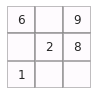

Solved


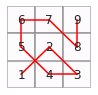

Solution took 0.1142 seconds


In [123]:
puzzle1 = [
     [6,0,9],
     [0,2,8],
     [1,0,0]
     ]

out = fill(puzzle1)

Starting Grid


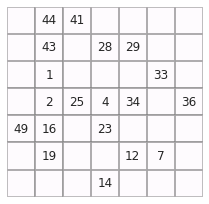

Solved


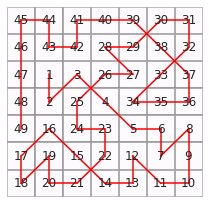

Solution took 0.3690 seconds


In [124]:
puzzle2 =  [
[0,44,41, 0, 0, 0, 0],
[0,43, 0,28,29, 0, 0],
[0, 1, 0, 0, 0,33, 0],
[0, 2,25, 4,34, 0,36],
[49,16, 0,23, 0, 0, 0],   
[0,19, 0, 0,12, 7, 0],
[0, 0, 0,14, 0, 0, 0]
]

out = fill(puzzle2)

Starting Grid


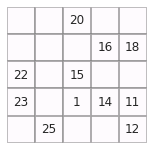

Solved


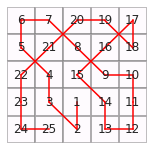

Solution took 0.2212 seconds


In [125]:
puzzle3 = [
[ 0, 0,20, 0, 0],
[ 0, 0, 0,16,18],
[22, 0,15, 0, 0],
[23, 0, 1,14,11],
[ 0,25, 0, 0,12],
]

out = fill(puzzle3)

Starting Grid


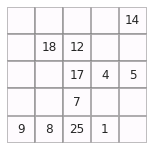

Solved


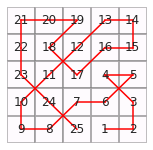

Solution took 0.2649 seconds


In [127]:
puzzle4 = [
[0, 0, 0, 0, 14],
[0, 18, 12, 0, 0],
[0, 0, 17, 4, 5],
[0, 0, 7, 0, 0],
[9, 8, 25, 1, 0],
]

out = fill(puzzle4)

Starting Grid


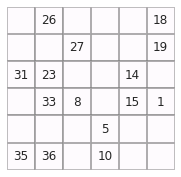

Solved


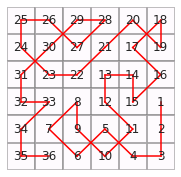

Solution took 0.2922 seconds


In [128]:
puzzle5 =  [
[ 0, 26,0, 0, 0,18],
[ 0, 0,27, 0, 0,19],
[31,23, 0, 0,14, 0],
[ 0,33, 8, 0,15, 1],
[ 0, 0, 0, 5, 0, 0],
[35,36, 0,10, 0, 0]
]

out = fill(puzzle5)

Starting Grid


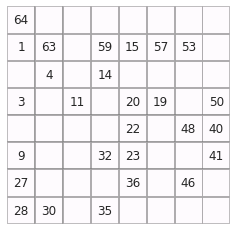

Solved


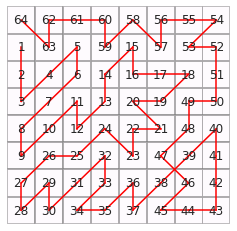

Solution took 0.6406 seconds


In [129]:
puzzle6 = [
[64, 0, 0, 0, 0, 0, 0, 0],
[ 1,63, 0,59,15,57,53, 0],
[ 0, 4, 0,14, 0, 0, 0, 0],
[ 3, 0,11, 0,20,19, 0,50],
[ 0, 0, 0, 0,22, 0,48,40],
[ 9, 0, 0,32,23, 0, 0,41],
[27, 0, 0, 0,36, 0,46, 0],
[28,30, 0,35, 0, 0, 0, 0]
 ]

out = fill(puzzle6)